In [94]:
# Importar bibliotecas utilizadas
import pandas as pd

import numpy as np




In [141]:
# Set of predefined words NLTK (Natural Language Toolkit)
import nltk 

#nltk.download('all')
set(stopwords.words('english'))

from nltk.tokenize import word_tokenize 

from nltk.corpus import stopwords 
#from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer

# Regular expression
import re

from wordcloud import WordCloud

import matplotlib.pyplot as plt

print(stopwords.words('english'))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\jcaet\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\jcaet\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\jcaet\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\jcaet\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\jcaet\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nltk_data]   

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]    |   Unzipping corpora\ycoe.zip.
[nltk_data]    | 
[nltk_data]  Done downloading collection all


In [96]:
# Coleta dados
catalogoVulnerabilidades = pd.read_csv('dados/known_exploited_vulnerabilities.csv', header=0, sep=',')

# Criar coluna booleana state com 0 para Unknown e 1 para Known
catalogoVulnerabilidades['codigoKnownRansomwareCampaignUse'] = np.where(catalogoVulnerabilidades['knownRansomwareCampaignUse'] == 'Known', 1, 0 )

#Reordenando as colunas
catalogoVulnerabilidades = catalogoVulnerabilidades[['cveID', 
                                                     'vendorProject',
                                                     'product',
                                                     'vulnerabilityName',
                                                     'dateAdded',
                                                     'shortDescription',
                                                     'requiredAction',
                                                     'dueDate',
                                                     'knownRansomwareCampaignUse',
                                                     'codigoKnownRansomwareCampaignUse',
                                                     'notes']]    



In [97]:
# Verificar tipos de colunas
catalogoVulnerabilidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   cveID                             1083 non-null   object
 1   vendorProject                     1083 non-null   object
 2   product                           1083 non-null   object
 3   vulnerabilityName                 1083 non-null   object
 4   dateAdded                         1083 non-null   object
 5   shortDescription                  1083 non-null   object
 6   requiredAction                    1083 non-null   object
 7   dueDate                           1083 non-null   object
 8   knownRansomwareCampaignUse        1083 non-null   object
 9   codigoKnownRansomwareCampaignUse  1083 non-null   int32 
 10  notes                             316 non-null    object
dtypes: int32(1), object(10)
memory usage: 89.0+ KB


In [98]:
# Excluir a coluna notes
catalogoVulnerabilidades.drop(columns=['notes'], inplace = True)

In [99]:
# Verificar alguns dados
catalogoVulnerabilidades.head()

,cveID,vendorProject,product,vulnerabilityName,dateAdded,shortDescription,requiredAction,dueDate,knownRansomwareCampaignUse,codigoKnownRansomwareCampaignUse
0,CVE-2021-27104,Accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA contains an OS command injection...,Apply updates per vendor instructions.,2021-11-17,Known,1
1,CVE-2021-27102,Accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA contains an OS command injection...,Apply updates per vendor instructions.,2021-11-17,Known,1
2,CVE-2021-27101,Accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA contains a SQL injection vulnera...,Apply updates per vendor instructions.,2021-11-17,Known,1
3,CVE-2021-27103,Accellion,FTA,Accellion FTA Server-Side Request Forgery (SSR...,2021-11-03,Accellion FTA contains a server-side request f...,Apply updates per vendor instructions.,2021-11-17,Known,1
4,CVE-2021-21017,Adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Acrobat and Reader contain a heap-base...,Apply updates per vendor instructions.,2021-11-17,Unknown,0


In [100]:
# Transformar tipos de dados
catalogoVulnerabilidades.dateAdded = pd.to_datetime(catalogoVulnerabilidades.dateAdded)
catalogoVulnerabilidades.dueDate = pd.to_datetime(catalogoVulnerabilidades.dueDate)
##Tranforma a coluna codigoKnownRansomwareCampaignUse para boolean
catalogoVulnerabilidades['codigoKnownRansomwareCampaignUse'] = catalogoVulnerabilidades['codigoKnownRansomwareCampaignUse'].astype('bool')
##Transforma colunas em string
catalogoVulnerabilidades['shortDescription'] = catalogoVulnerabilidades['shortDescription'].astype('string')

In [101]:
# Verificar tipos de colunas após transformação
catalogoVulnerabilidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   cveID                             1083 non-null   object        
 1   vendorProject                     1083 non-null   object        
 2   product                           1083 non-null   object        
 3   vulnerabilityName                 1083 non-null   object        
 4   dateAdded                         1083 non-null   datetime64[ns]
 5   shortDescription                  1083 non-null   string        
 6   requiredAction                    1083 non-null   object        
 7   dueDate                           1083 non-null   datetime64[ns]
 8   knownRansomwareCampaignUse        1083 non-null   object        
 9   codigoKnownRansomwareCampaignUse  1083 non-null   bool          
dtypes: bool(1), datetime64[ns](2), object(6), string

In [102]:
# Função para limpar os textos das colunas do dataframe
def limpa_coluna(corpus):
    return re.sub(r'[^a-zA-Z0-9\s]', '', corpus)

In [103]:
# Limpa a coluna 
pd_catalogoVulnerabilidades = pd.DataFrame(catalogoVulnerabilidades)
pd_catalogoVulnerabilidades['shortDescription'] = pd_catalogoVulnerabilidades['shortDescription'].apply(lambda x: limpa_coluna(str(x).lower()))

pd_catalogoVulnerabilidades.shortDescription

0       accellion fta contains an os command injection...
1       accellion fta contains an os command injection...
2       accellion fta contains a sql injection vulnera...
3       accellion fta contains a serverside request fo...
4       acrobat acrobat and reader contain a heapbased...
                              ...                        
1078    microsoft windows smartscreen contains a secur...
1079    cisco adaptive security appliance asa and fire...
1080    microsoft exchange server contains an unspecif...
1081    connectwise screenconnect contains an authenti...
1082    microsoft streaming service contains an untrus...
Name: shortDescription, Length: 1083, dtype: object

In [142]:
# Função de Tokenização
def tokenizacao (corpus):
    tokens = word_tokenize(corpus)
    return tokens

In [170]:
# Copia todos os registros
pd_catalogoVulnerabilidades_tk['shortDescription'] = pd_catalogoVulnerabilidades['shortDescription'].copy()
pd_catalogoVulnerabilidades_tk['shortDescription'] = pd_catalogoVulnerabilidades_tk['shortDescription'].apply(lambda x: tokenizacao(str(x)))

pd_catalogoVulnerabilidades_tk.shortDescription.head()

0    [accellion, fta, contains, an, os, command, in...
1    [accellion, fta, contains, an, os, command, in...
2    [accellion, fta, contains, a, sql, injection, ...
3    [accellion, fta, contains, a, serverside, requ...
4    [acrobat, acrobat, and, reader, contain, a, he...
Name: shortDescription, dtype: object

In [171]:
tokens_contagem = ' '.join([word for word in pd_catalogoVulnerabilidades.shortDescription])
tokens_frequencia = nltk.FreqDist(tokens_contagem)
df_frequencia_tk = pd.DataFrame({"token": list(tokens_frequencia.keys()),
                                 "frequencia": list(tokens_frequencia.values())})


df_frequencia_tk




,token,frequencia
0,a,14808
1,c,8926
2,e,18648
3,l,8944
4,i,13766
5,o,13063
6,n,11793
7,,28188
8,f,3476
9,t,15235


In [105]:
# Função remover stop words
def remove_stop_words(corpus):
    # Carrega lista de stop words do inglês
    sw_en = set(stopwords.words('english'))
    tokens = corpus
    return corpus

In [106]:
# Função de Lematização
def lematizacao (df, nome_coluna):
    df[nome_coluna] = df[nome_coluna].map(lambda x: WordNetLemmatizer.lemmatize(x))
    return df

In [121]:
# Vetorizar coluna
vetorizar = CountVectorizer(lowercase = False, max_features=100)
bow = vetorizar.fit_transform(catalogoVulnerabilidades.shortDescription)

print(bow.shape)

(1083, 100)


In [108]:
# Tranforma matriz esparsa em Dataframe
df_shortDescription_bow = pd.DataFrame.sparse.from_spmatrix(bow, columns=vetorizar.get_feature_names_out())

df_shortDescription_bow.head()

,Adobe,An,Apple,CVE,Chrome,Chromium,Cisco,DoS,Google,HTML,...,unspecified,use,user,users,via,vulnerability,web,when,which,with
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [109]:
# Wordcloud
shortDescription_all_words = ' '.join([word for word in pd_catalogoVulnerabilidades.shortDescription])

# Quantidade de palavras
print(len(shortDescription_all_words))

196269


In [110]:
# Gerar wordcloud

## https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

shortDescription_wc = WordCloud(width= 800, height= 500, max_font_size = 110, collocations=False).generate(shortDescription_all_words)

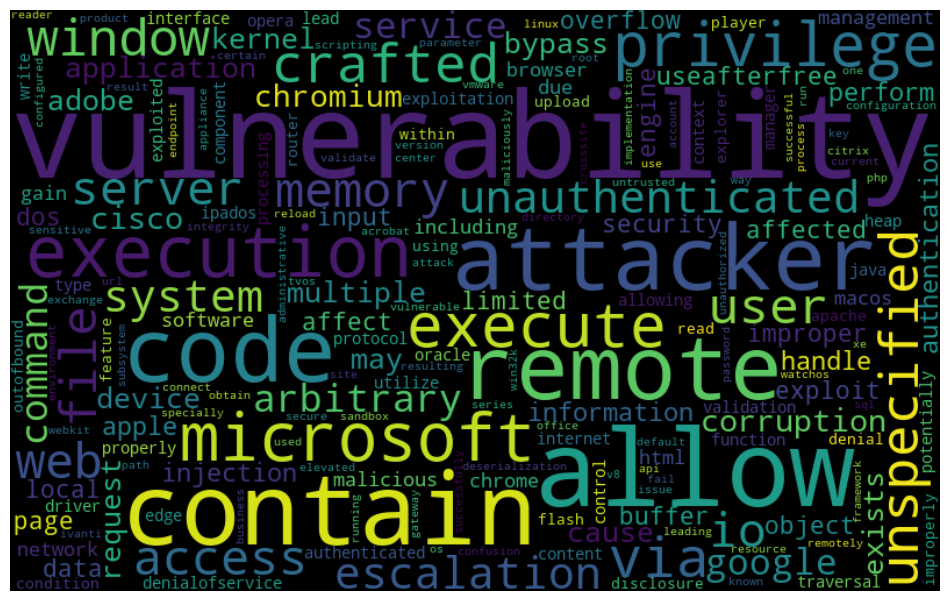

In [119]:
# Plotar wordcloud
plt.figure(figsize=(12, 8.5))
plt.imshow(shortDescription_wc, interpolation='bilinear') #ver outras interpolações
plt.axis("off")
plt.show()